In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data)
ride_data = pd.read_csv(ride_data)

# Combine the data into a single dataset
combined_data = pd.merge(city_data, ride_data, on="city")

# Display the data table for preview
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

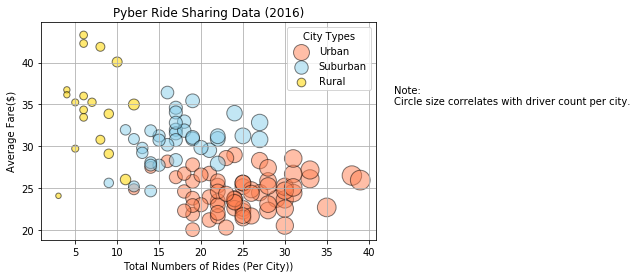

In [3]:
# Obtain the x and y coordinates for each of the three city types
urban_city = combined_data.loc[(combined_data["type"] == "Urban")]
suburban_city = combined_data.loc[(combined_data["type"] == "Suburban")]
rural_city = combined_data.loc[(combined_data["type"] == "Rural")]

# Build the scatter plots for each city types

af_urban = urban_city.groupby(['city'])['fare'].mean()
tr_urban = urban_city.groupby(['city']).count()['ride_id']
td_urban = urban_city.groupby(['city'])['driver_count'].value_counts()

af_suburban = suburban_city.groupby(['city'])['fare'].mean()
tr_suburban = suburban_city.groupby(['city']).count()['ride_id']
td_suburban = suburban_city.groupby(['city'])['driver_count'].value_counts()

af_rural = rural_city.groupby(['city'])['fare'].mean()
tr_rural = rural_city.groupby(['city']).count()['ride_id']
td_rural = rural_city.groupby(['city'])['driver_count'].value_counts()

plt.scatter(tr_urban, af_urban,s=td_urban*10, marker = 'o', 
            color = "coral", edgecolors ='black',alpha = 0.5, label ="Urban")

plt.scatter(tr_suburban, af_suburban,s=td_suburban*10, marker = 'o', 
            color = "skyblue", edgecolors ='black',alpha = 0.5, label ="Suburban")

plt.scatter(tr_rural, af_rural,s=td_rural*10, marker = 'o', 
            color = "gold", edgecolors ='black',alpha = 0.55, label ="Rural")

plt.grid()
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Numbers of Rides (Per City))")
plt.ylabel("Average Fare($)")

# Create a legend
plt.legend(loc ='upper right', title = "City Types")

# Incorporate a text label regarding circle size
plt.text(43,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save Figure
plt.savefig("data/PyberScatter.png", bbox_inches="tight")

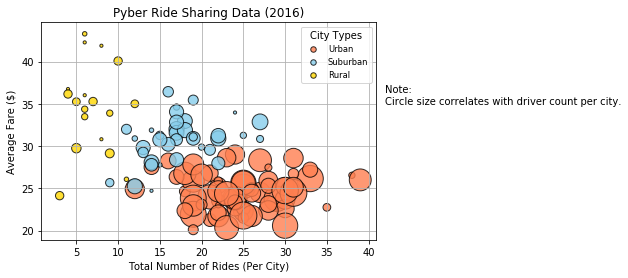

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

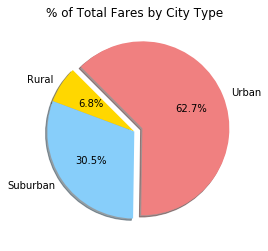

In [11]:
# Calculate Type Percents
type_groupped = combined_data.groupby(['type'])
fare_sum = type_groupped['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=135)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("data/TFCityType.png")


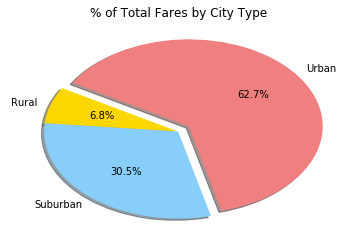

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

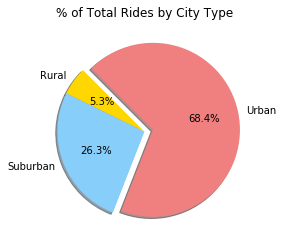

In [13]:
# Calculate Ride Percents
rides_count = type_groupped['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=135)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Data/TRbyCityType.png")

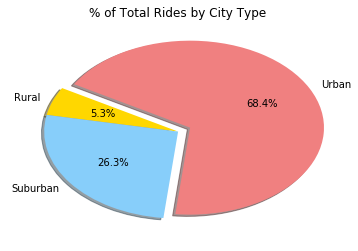

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

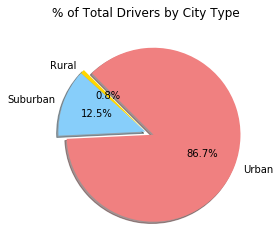

In [15]:
# Calculate Driver Percents
driver_type_groupped = combined_data.groupby(['type'])
drivers_sum = driver_type_groupped['driver_count'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(drivers_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=135)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Data/TDbyCityType.png")


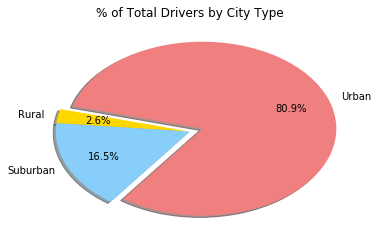

In [6]:
# Show Figure
plt.show()